In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np 
import pandas as pd
import os
from tensorflow import keras
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K
# Common imports
import numpy as np
import os
import timeit
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path =  "/content/drive/MyDrive/Dataset_BUSI_with_GT (2)/"

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
path = "/content/drive/MyDrive/Dataset_BUSI_with_GT (2)"
dir_list = [os.path.join(path,i) for i in os.listdir(path)]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict 

{'benign': 891, 'malignant': 421, 'normal': 266}

In [6]:
import re
def clean(name):
    name = re.sub('[benign ().p]','',str(name))
    return name

In [7]:
df = pd.DataFrame(os.listdir(dir_list[0]))
# df = df.apply(str,axis=1)
df = df[0].apply(clean)
# print(df.info())
df = df[~df.str.contains('mask',regex =False)]
df = df.apply(str)
df_list = list(df)
type(df_list)
df_list.sort()
print(len(df_list))

210


In [8]:
img_size = 256
img_channel = 3
X_b , Xm_b , y_b = np.zeros((437,img_size,img_size,img_channel)) , np.zeros((437,img_size,img_size,img_channel)) , np.full(437,1) 
X_n , Xm_n , y_n = np.zeros((133,img_size,img_size,img_channel)) , np.zeros((133,img_size,img_size,img_channel)) , np.full(133,0) 
X_m , Xm_m , y_m = np.zeros((210,img_size,img_size,img_channel)) , np.zeros((210,img_size,img_size,img_channel)) , np.full(210,2)

In [9]:
img1_path = os.path.join(os.path.join(path,'benign'),os.listdir(os.path.join(path,'benign'))[1])

pil_img = load_img(img1_path,color_mode = 'rgb',target_size=(img_size,img_size))
img = img_to_array(pil_img)
img_shape = img.shape
print(img_shape)

def img_num(filename):
    
    val = 0
    
    for i in range(len(filename)) :
        if filename[i] == '(' :
            while True :
                i += 1
                if filename[i] == ')' :
                    break
                val = (val*10) + int(filename[i])
            break
    
    return val

for tumor_path in dir_list :
    for image in os.listdir(tumor_path) :
        p = os.path.join(tumor_path, image)
        pil_img = load_img(p,color_mode = 'rgb',target_size=(img_size,img_size))         # read image as  grayscale ans resize it
        
        if image[-5] == ')' :                                   #if real image 
            
            if image[0] == 'b' :
                X_b[img_num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                               # to X as benign , normal
                X_n[img_num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                X_m[img_num(image)-1]+= img_to_array(pil_img)
        else :                                                 #else masked image
            
            if image[0] == 'b' :
                Xm_b[img_num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                               # mask to y.
                Xm_n[img_num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                Xm_m[img_num(image)-1]+= img_to_array(pil_img)

(256, 256, 3)


In [10]:
X = np.concatenate((X_b, X_n, X_m), axis = 0)
Xm = np.concatenate((Xm_b, Xm_n, Xm_m), axis = 0)
y = np.concatenate((y_b, y_n, y_m), axis = 0)
X /= 255.0
Xm /= 255.0

print(X.shape)
print(Xm.shape)
print(y.shape)


(780, 256, 256, 3)
(780, 256, 256, 3)
(780,)


In [11]:
X = np.concatenate((X_b, X_n, X_m), axis = 0)
Xm = np.concatenate((Xm_b, Xm_n, Xm_m), axis = 0)
y = np.concatenate((y_b, y_n, y_m), axis = 0)
X /= 255.0
Xm /= 255.0

print(X.shape)
print(Xm.shape)
print(y.shape)


(780, 256, 256, 3)
(780, 256, 256, 3)
(780,)


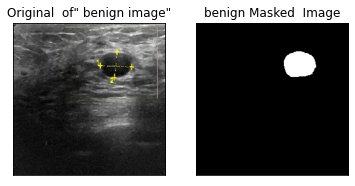

In [12]:
plt.subplot(121),plt.imshow(X[5],cmap = 'gray')

plt.title('Original  of" benign image"'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Xm[5],cmap = 'gray')
plt.title('benign Masked  Image'), plt.xticks([]), plt.yticks([])

plt.show()

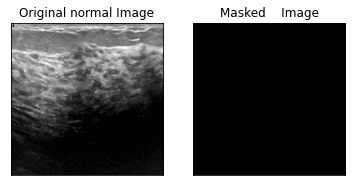

In [13]:
plt.subplot(121),plt.imshow(X[500],cmap = 'gray')
plt.title('Original normal Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Xm[500],cmap = 'gray')
plt.title('Masked    Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
def converter(img):
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    
masked=[]
for i in Xm:
    masked.append(converter(i))



In [15]:
print(masked[0].shape)
masked=np.array(masked)

(256, 256)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,masked, test_size=.2, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(624, 256, 256, 3)
(624, 256, 256)
(156, 256, 256, 3)
(156, 256, 256)


In [18]:
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Concatenate
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose

from keras import Model

In [19]:


# this block essentially performs 2 convolution

def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)
    
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)
        
    x =tf.keras.layers.Activation('relu')(x)
    
    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)
        
    x = tf.keras.layers.Activation('relu')(x)
    
    return x


# Now defining Unet 
def GiveMeUnet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):
    # defining encoder Path
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)
    
    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)
    
    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)
    
    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)
    
    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    # defining decoder path
    u6 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(droupouts)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u7 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u8 = tf.keras.layers.Conv2DTranspose(numFilters*2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    u9 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    
    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model

# Model Instantiation

In [21]:
## instanctiating model
inputs = tf.keras.layers.Input((256, 256, 3))
model = GiveMeUnet(inputs, droupouts= 0.07)
model.compile(loss= tf.keras.losses.mean_squared_error, optimizer = keras.optimizers.Adam(learning_rate = 0.00005) ,metrics = ['accuracy'])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_18 (BatchN  (None, 256, 256, 16  64         ['conv2d_19[0][0]']              
 ormalization)                  )                                                           

In [22]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=15,restore_best_weights=True, verbose=1)

In [24]:
start = timeit.default_timer()

In [25]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), callbacks = [es])

Epoch 1/100
20/20 [==============================] - 30s 643ms/step - loss: 0.2088 - accuracy: 0.6747 - val_loss: 0.2469 - val_accuracy: 0.6475
Epoch 2/100
20/20 [==============================] - 8s 392ms/step - loss: 0.1944 - accuracy: 0.7366 - val_loss: 0.2216 - val_accuracy: 0.8679
Epoch 3/100
20/20 [==============================] - 8s 396ms/step - loss: 0.1825 - accuracy: 0.7825 - val_loss: 0.2011 - val_accuracy: 0.9055
Epoch 4/100
20/20 [==============================] - 8s 398ms/step - loss: 0.1709 - accuracy: 0.8176 - val_loss: 0.1842 - val_accuracy: 0.9127
Epoch 5/100
20/20 [==============================] - 8s 401ms/step - loss: 0.1574 - accuracy: 0.8505 - val_loss: 0.2086 - val_accuracy: 0.6887
Epoch 6/100
20/20 [==============================] - 8s 406ms/step - loss: 0.1417 - accuracy: 0.8771 - val_loss: 0.2528 - val_accuracy: 0.5163
Epoch 7/100
20/20 [==============================] - 8s 408ms/step - loss: 0.1264 - accuracy: 0.8947 - val_loss: 0.3897 - val_accuracy: 0.391

In [26]:
end = timeit.default_timer()

In [27]:
model.save("Unet_Model.h5")

In [28]:
print('time to unet model in seconds is : \n{0}'.format(end-start))


time to unet model in seconds is : 
866.4719870469999


In [29]:
def converter(img):
   b_np= np.array(i)
   g_np= np.array(i)
   r_np= np.array(i)
   final_img = np.dstack([b_np, g_np, r_np]).astype(np.uint8)
   return np.array(final_img)

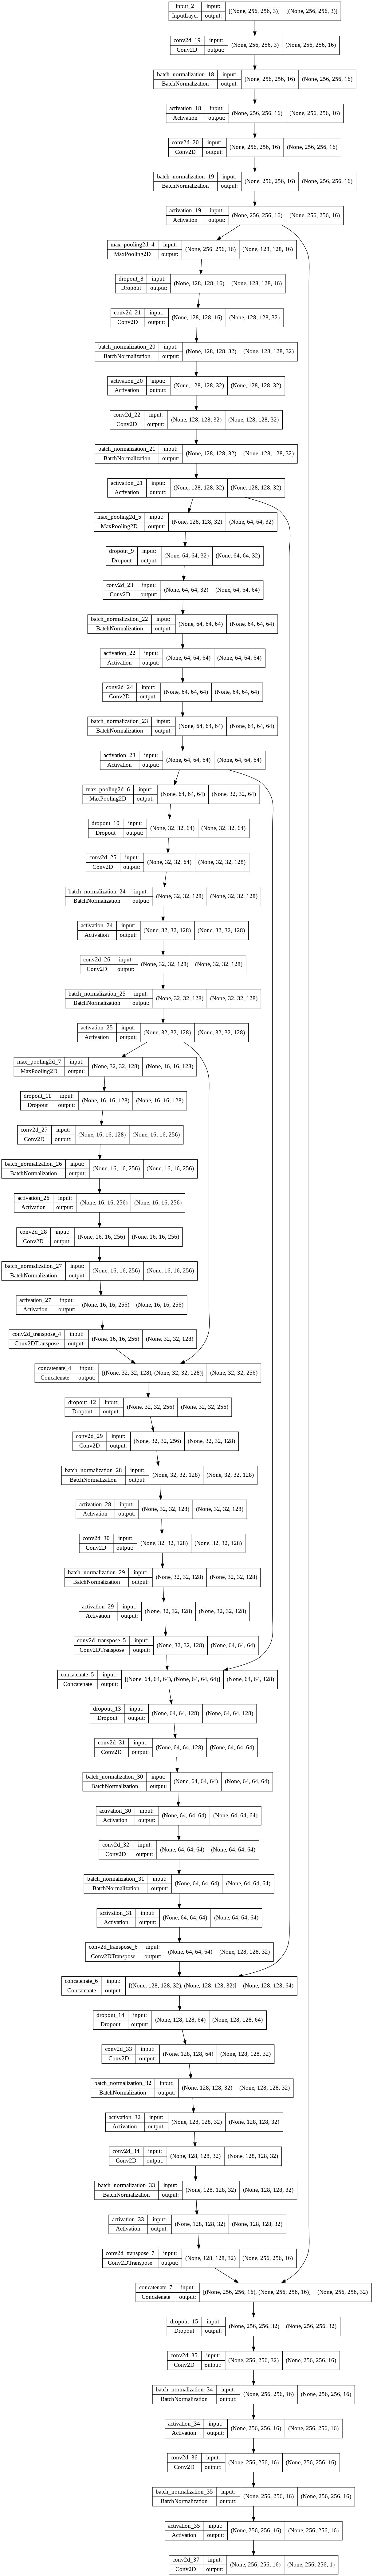

In [30]:
keras.utils.plot_model(model, './model_plot.png', show_shapes = True)

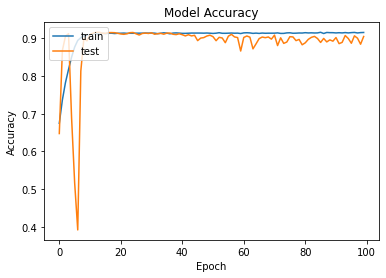

In [31]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

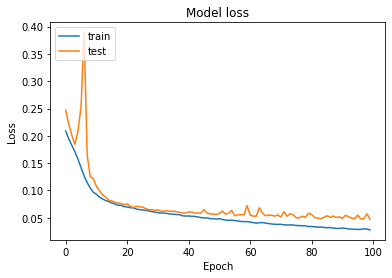

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
score = model.evaluate(X_test, y_test, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100)

5/5 [==============================] - 1s 108ms/step - loss: 0.0474 - accuracy: 0.9051
Test loss: 0.04735426604747772
Test accuracy: 90.51110744476318
